# Histogram Equalization

https://en.wikipedia.org/wiki/Histogram_equalization

In [92]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

## Example 1: 8x8 Bitmap with Values in the Range of 64 to 192

In [93]:
rg = np.random.default_rng()

img = 64 + rg.integers(0, 64, (8,8), dtype=np.uint8) + rg.integers(0, 64, (8,8), dtype=np.uint8)
print(img)

[[105 129 146 121 107 152 114 113]
 [131 149 142 173 176 136 128 128]
 [115 125  86 129 162 113 133 150]
 [148 134 132 128 109 119 148 103]
 [125 107 118  88  86  77 132 136]
 [103 126 125 125 119 124 109 118]
 [100 161  91 132 128 142 130 127]
 [113 113 128 121 164 138 165  97]]


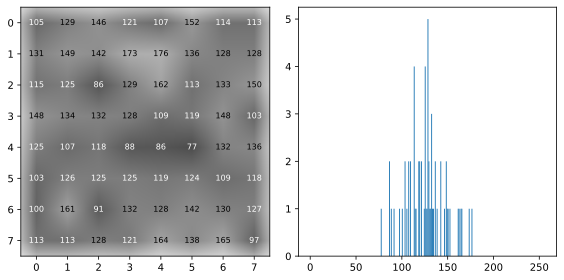

In [94]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

for y, row in enumerate(img):
    for x, color in enumerate(row):
        text_color = "white" if color < 128 else "black"
        plt.text(x, y, color, ha="center", va="center", color=text_color, size=8)

plt.subplot(122)
plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram", zorder=2)

plt.tight_layout()
plt.show()

### Step 1: Histogram of all Color Values

Counts how often each individual color appears in the image. For example, if `hist[97] == 5`, then the color with the value 97 appears five times in the image.

In [95]:
hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))
print(hist.reshape((16, 16)))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 2 0 1 0 2 0 2 0 0]
 [0 4 1 1 0 0 2 2 0 2 0 0 1 4 1 1]
 [5 2 1 1 3 1 1 0 2 0 1 0 0 0 2 0]
 [0 0 1 0 2 1 1 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### Step 2: CDF (Cumulative Distribution Function)

Adds up the values of the histogram.

**Example for an 8x8 image with 256 grayscale levels:**

```python
hist[0] = 0        cdf(0) = 0
hist[1] = 2        cdf(1) = 2
hist[2] = 1        cdf(2) = 3
hist[3] = 1        cdf(3) = 4
hist[4] = 3        cdf(4) = 7
hist[5] = 2        cdf(5) = 9
hist[6] = 0        cdf(6) = 9
hist[7] = 1        cdf(7) = 10
...
hist[254] = 1      cdf(254) = 63
hist[255] = 0      cdf(255) = 64

cdf(n) = cdf(n-1) + hist[n]
sum(hist) == cdf(255) == number of pixels == 8*8 == 64
```

In [96]:
cdf = hist.cumsum(dtype=int)
print(cdf.reshape((16, 16)))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1]
 [ 1  1  1  1  1  1  3  3  4  4  4  5  5  5  5  5]
 [ 5  6  6  6  7  7  7  9  9 10 10 12 12 14 14 14]
 [14 18 19 20 20 20 22 24 24 26 26 26 27 31 32 33]
 [38 40 41 42 45 46 47 47 49 49 50 50 50 50 52 52]
 [52 52 53 53 55 56 57 57 58 58 58 58 58 58 58 58]
 [58 59 60 60 61 62 62 62 62 62 62 62 62 63 63 63]
 [64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
 [64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
 [64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
 [64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
 [64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]


In [97]:
print(f" hist.sum() = {hist.sum()}")
print(f"   cdf(255) = {cdf[-1]}")
print(f"  cdf.max() = {cdf.max()}")
print(f"image shape = {img.shape} = {img.size} pixels")

 hist.sum() = 64
   cdf(255) = 64
  cdf.max() = 64
image shape = (8, 8) = 64 pixels


### Step 3: Determine the smallest Value > 0 of the CDF

In [98]:
cdf_min = cdf[cdf > 0].min()
print(cdf_min)

1


### Step 4: CDF Normalization

All values of the CDF > 0 are converted to a range from 0 to 255.

**Formula:**

```python
((cdf[n] - cdf_min) / (64 - cdf_min)) * 255
```

- `cdf_min`: The smallest value > 0 of the CDF
- 64: Number of pixels in the image (8x8)
- 255: Number of grayscale levels - 1

**Example, n=122:**

```python
((cdf[122] - cdf_min) / (64 - cdf_min)) * 255
((28 - 2) / (64 - 2)) * 255
(26 / 62) * 255
106.93548387096774
```

**Simplification of the formula:**

```python
f = 255 / (64 - cdf_min)
(cdf[n] - cdf_min) * f
```

**Example (simplified):**

```python
f = 255 / (64 - cdf_min)
f = 255 / 62
f = 4.112903225806452

(cdf[122] - cdf_min) * f
(28 - 2) * f
26 * f
106.93548387096774
```

In [99]:
f = 255 / (64 - cdf_min)
print(f)

4.0476190476190474


In [100]:
cdf_normalized = cdf.astype(np.float32)
cdf_normalized[cdf_normalized > 0.0] = (cdf_normalized[cdf_normalized > 0.0] - cdf_min) * f
cdf_normalized = cdf_normalized.round().astype(np.uint8)
print(cdf_normalized.reshape((16, 16)))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   8   8  12  12  12  16  16  16  16  16]
 [ 16  20  20  20  24  24  24  32  32  36  36  45  45  53  53  53]
 [ 53  69  73  77  77  77  85  93  93 101 101 101 105 121 125 130]
 [150 158 162 166 178 182 186 186 194 194 198 198 198 198 206 206]
 [206 206 210 210 219 223 227 227 231 231 231 231 231 231 231 231]
 [231 235 239 239 243 247 247 247 247 247 247 247 247 251 251 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

### Step 5: Recolor the Image

The new colors of the image are determined based on the *normalized CDF*.

To do this, take an existing color from the image and look up the new color value for that color in the normalized CDF.

The previously darkest color of the original image will then have the value 0, and the previously brightest color will have the value 255. The new image will thus use the full color spectrum.

**Example:**

```python
122 = img[3]  # pixel 4
106 = cdf_normalized[122]
img2[3] = 106
```

In [101]:
# colors of the first row of the image
for old_color in img[0]:
    print(f"old color: {old_color:3} --> new color: {cdf_normalized[old_color]:3}")

old color: 105 --> new color:  36
old color: 129 --> new color: 158
old color: 146 --> new color: 210
old color: 121 --> new color: 101
old color: 107 --> new color:  45
old color: 152 --> new color: 231
old color: 114 --> new color:  73
old color: 113 --> new color:  69


In [102]:
img_equalized = np.array(cdf_normalized[img], dtype=np.uint8)
print(img_equalized)

[[ 36 158 210 101  45 231  73  69]
 [166 223 206 251 255 194 150 150]
 [ 77 121   8 158 239  69 182 227]
 [219 186 178 150  53  93 219  32]
 [121  45  85  12   8   0 178 194]
 [ 32 125 121 121  93 105  53  85]
 [ 24 235  16 178 150 206 162 130]
 [ 69  69 150 101 243 198 247  20]]


### Results

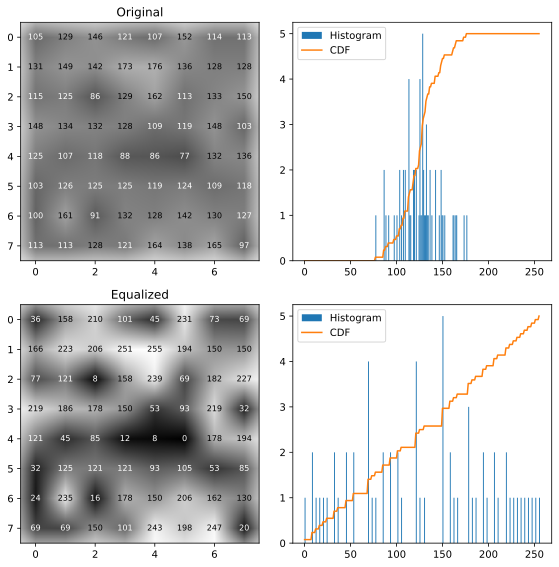

In [103]:
def plot_image(subplot_spec, img, title):
    plt.subplot(subplot_spec, title=title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

    for y, row in enumerate(img):
        for x, color in enumerate(row):
            text_color = "white" if color < 128 else "black"
            plt.text(x, y, color, ha="center", va="center", color=text_color, size=8)

def plot_histogram(subplot_spec, img):
    plt.subplot(subplot_spec)
    hist, bins, _ = plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram")
    cdf = hist.cumsum()
    plt.plot(cdf * (hist.max() / cdf.max()), label="CDF")
    plt.legend()


plt.figure(figsize=(8, 8))

plot_image(221, img, "Original")
plot_histogram(222, img)

plot_image(223, img_equalized, "Equalized")
plot_histogram(224, img_equalized)

plt.tight_layout()
plt.show()

## Example 2: `photo_64x48_grayscale.png`

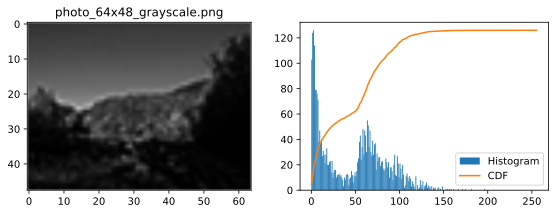

In [104]:
def plot_image(subplot_spec, img, title):
    plt.subplot(subplot_spec, title=title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

def plot_histogram(subplot_spec, img):
    plt.subplot(subplot_spec)
    hist, bins, _ = plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram")
    cdf = hist.cumsum()
    plt.plot(cdf * (hist.max() / cdf.max()), label="CDF", zorder=1)
    plt.legend()


img_photo = np.array(plt.imread("../images/photo_64x48_grayscale.png") * 255, dtype=np.uint8)

plt.figure(figsize=(8, 3))

plot_image(121, img_photo, "photo_64x48_grayscale.png")
plot_histogram(122, img_photo)

plt.tight_layout()
plt.show()

In [105]:
hist, bins = np.histogram(img_photo.flatten(), bins=256, range=(0, 256))
cdf = hist.cumsum(dtype=int)

In [106]:
print(f" hist.sum() = {hist.sum()}")
print(f"   cdf(255) = {cdf[-1]}")
print(f"  cdf.max() = {cdf.max()}")
print(f"image shape = {img_photo.shape} = {img_photo.size} pixels")

 hist.sum() = 3072
   cdf(255) = 3072
  cdf.max() = 3072
image shape = (48, 64) = 3072 pixels


In [107]:
cdf_min = cdf[cdf > 0].min()
print(cdf_min)

103


In [108]:
f = 255 / (img_photo.size - cdf_min)
print(f)

0.08588750421017177


In [109]:
cdf_normalized = cdf.astype(np.float32)
cdf_normalized[cdf_normalized > 0.0] = (cdf_normalized[cdf_normalized > 0.0] - cdf_min) * f
cdf_normalized = cdf_normalized.round().astype(np.uint8)

In [110]:
img_photo_equalized = np.array(cdf_normalized[img_photo], dtype=np.uint8)

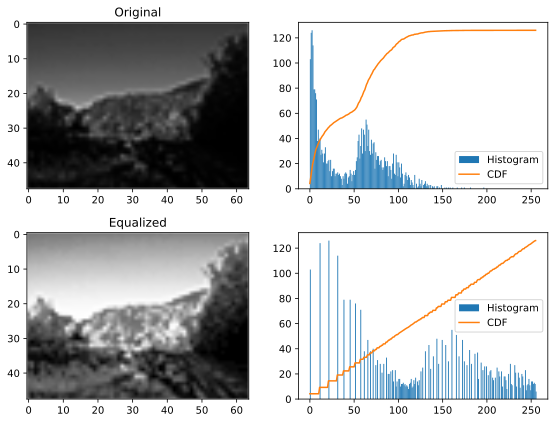

In [111]:
def plot_image(subplot_spec, img, title):
    plt.subplot(subplot_spec, title=title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

def plot_histogram(subplot_spec, img):
    plt.subplot(subplot_spec)
    hist, bins, _ = plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram")
    cdf = hist.cumsum()
    plt.plot(cdf * (hist.max() / cdf.max()), label="CDF")
    plt.legend()


plt.figure(figsize=(8, 6))

plot_image(221, img_photo, "Original")
plot_histogram(222, img_photo)

plot_image(223, img_photo_equalized, "Equalized")
plot_histogram(224, img_photo_equalized)

plt.tight_layout()
plt.show()

## Example 3: `Unequalized_Hawkes_Bay_NZ.jpg`

https://en.wikipedia.org/wiki/Histogram_equalization#Full-sized_image

Shape: (683, 1024, 3)

The RGB tuples always consist of the same value (e.g., `[128, 128, 128]`). Therefore, the image is converted into a 2D grayscale image. For this, the first byte of each RGB tuple is used.

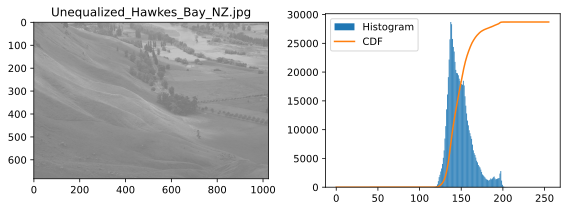

In [112]:
def plot_image(subplot_spec, img, title):
    plt.subplot(subplot_spec, title=title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

def plot_histogram(subplot_spec, img):
    plt.subplot(subplot_spec)
    hist, bins, _ = plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram")
    cdf = hist.cumsum()
    plt.plot(cdf * (hist.max() / cdf.max()), label="CDF")
    plt.legend()


img_photo2 = plt.imread("../images/Unequalized_Hawkes_Bay_NZ.jpg")
img_photo2 = img_photo2[...,0].reshape((img_photo2.shape[0],-1))

plt.figure(figsize=(8, 3))

plot_image(121, img_photo2, "Unequalized_Hawkes_Bay_NZ.jpg")
plot_histogram(122, img_photo2)

plt.tight_layout()
plt.show()

In [113]:
hist, bins = np.histogram(img_photo2.flatten(), bins=256, range=(0, 256))
cdf = hist.cumsum(dtype=int)

In [114]:
print(f" hist.sum() = {hist.sum()}")
print(f"   cdf(255) = {cdf[-1]}")
print(f"  cdf.max() = {cdf.max()}")
print(f"image shape = {img_photo2.shape} = {img_photo2.size} pixels")

 hist.sum() = 699392
   cdf(255) = 699392
  cdf.max() = 699392
image shape = (683, 1024) = 699392 pixels


In [115]:
cdf_min = cdf[cdf > 0].min()
print(cdf_min)

1


In [116]:
f = 255 / (img_photo2.size - cdf_min)
print(f)

0.00036460291882509213


In [117]:
cdf_normalized = cdf.astype(np.float32)
cdf_normalized[cdf_normalized > 0.0] = (cdf_normalized[cdf_normalized > 0.0] - cdf_min) * f
cdf_normalized = cdf_normalized.round().astype(np.uint8)

In [118]:
img_photo2_equalized = np.array(cdf_normalized[img_photo2], dtype=np.uint8)

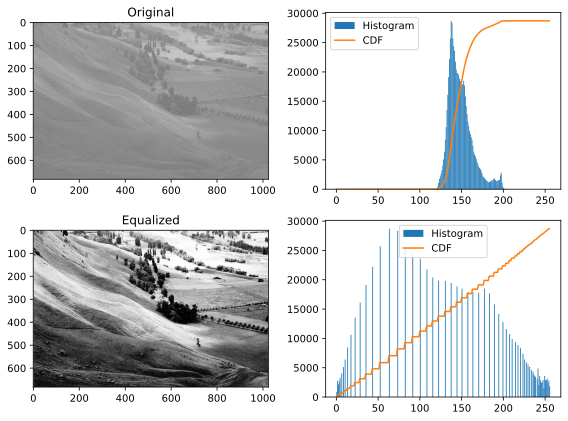

In [119]:
def plot_image(subplot_spec, img, title):
    plt.subplot(subplot_spec, title=title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255, interpolation="none")

def plot_histogram(subplot_spec, img):
    plt.subplot(subplot_spec)
    hist, bins, _ = plt.hist(img.flatten(), bins=256, range=(0, 256), label="Histogram")
    cdf = hist.cumsum()
    plt.plot(cdf * (hist.max() / cdf.max()), label="CDF")
    plt.legend()


plt.figure(figsize=(8, 6))

plot_image(221, img_photo2, "Original")
plot_histogram(222, img_photo2)

plot_image(223, img_photo2_equalized, "Equalized")
plot_histogram(224, img_photo2_equalized)

plt.tight_layout()
plt.show()